In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df=pd.read_csv(r'D:\data science\Indolike intern\task 1  Superstore\Superstore.csv', encoding='latin1')

In [60]:
#show dataframe

df.head(8)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery Time,total sales,total_sales,sales_after_discount
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,523.9200,523.9200,261.9600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2195.8200,2195.8200,731.9400
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,29.2400,29.2400,14.6200
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,4787.8875,4787.8875,957.1275
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,44.7360,44.7360,22.1680
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5,342.0200,342.0200,48.8600
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Art,Newell 322,7.2800,4,0.00,1.9656,5,29.1200,29.1200,7.2800
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,5,5442.9120,5442.9120,906.9520


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [33]:
df.value_counts().sort_values(ascending=True)

Row ID  Order ID        Order Date  Ship Date   Ship Mode       Customer ID  Customer Name       Segment    Country        City           State       Postal Code  Region   Product ID       Category         Sub-Category  Product Name                                                               Sales    Quantity  Discount  Profit 
1       CA-2016-152156  11/8/2016   11/11/2016  Second Class    CG-12520     Claire Gute         Consumer   United States  Henderson      Kentucky    42420        South    FUR-BO-10001798  Furniture        Bookcases     Bush Somerset Collection Bookcase                                          261.960  2         0.0       41.9136    1
20      CA-2014-143336  8/27/2014   9/1/2014    Second Class    ZD-21925     Zuschuss Donatelli  Consumer   United States  San Francisco  California  94109        West     TEC-PH-10001949  Technology       Phones        Cisco SPA 501G IP Phone                                                    213.480  3         0.2       16.0110

In [ ]:
#check is there is any Null values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
#Check if there is any duplicated

df.duplicated().sum()

0

In [ ]:
#check Outlier

Q1=df["Sales"].quantile(0.25)
Q3=df["Sales"].quantile(0.75)
IQR=Q3-Q1
Lower_pound=Q1-1.5*IQR
Upper_pound=Q1+1.5*IQR
outlier=df[(df['Sales']>=Lower_pound)&(df['Sales']<=Upper_pound)]
outlier.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694


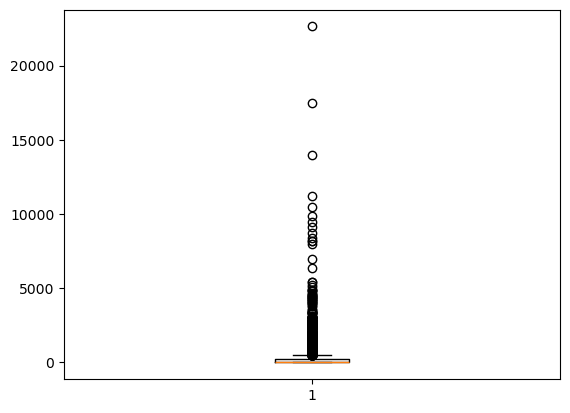

In [28]:
#show Outlier
plt.boxplot(df["Sales"])
plt.show()

In [ ]:
#Statistical analysis
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


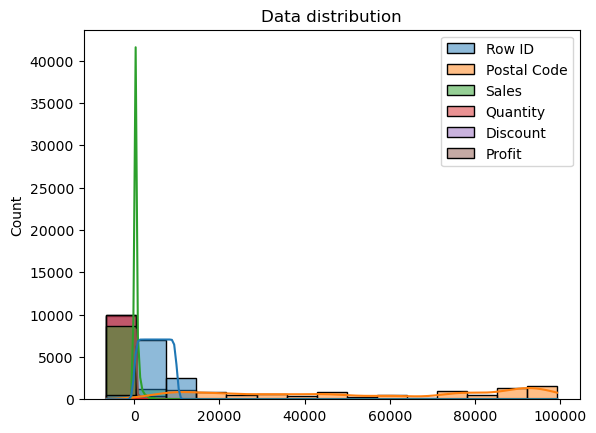

In [ ]:
#To know distribution All data
sns.histplot(df,bins=15,kde=True)
plt.title("Data distribution")
plt.ylabel("Count")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because n

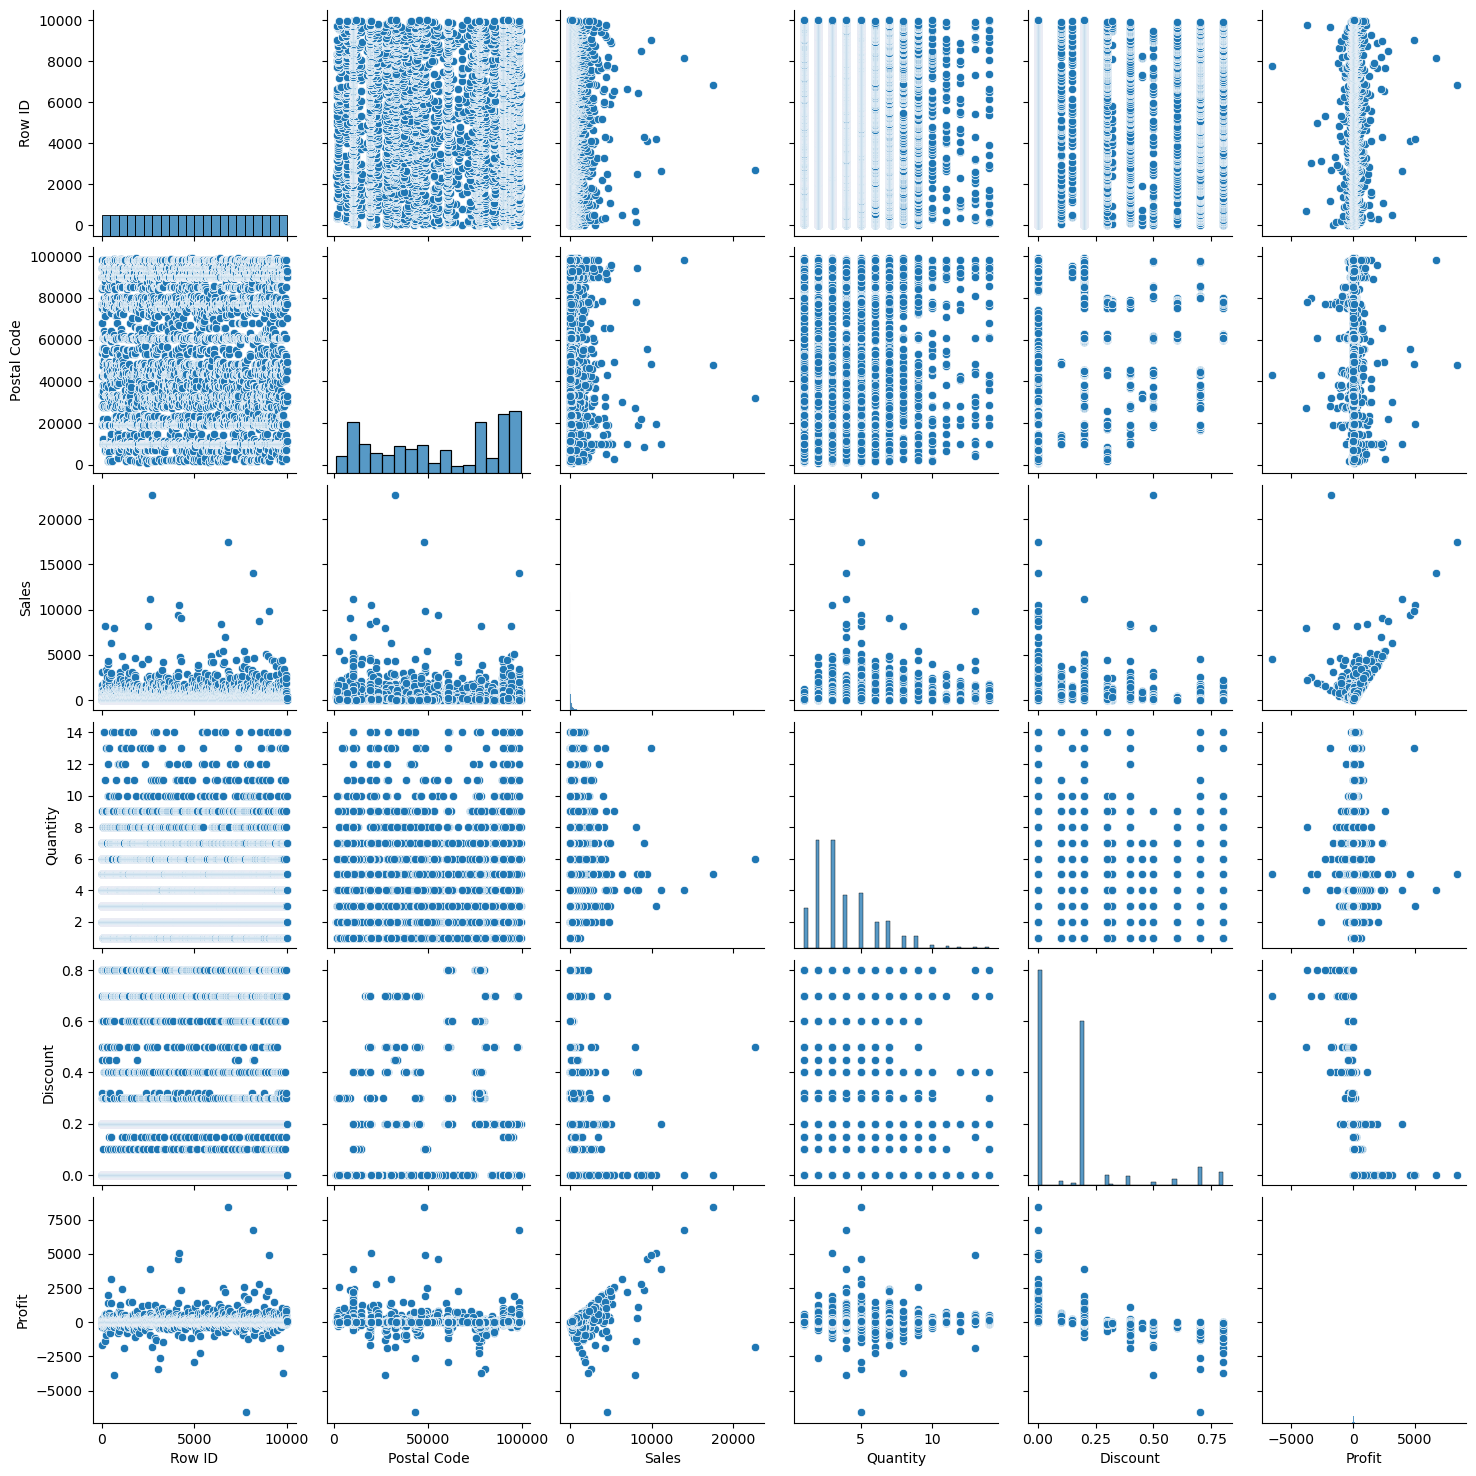

In [32]:
#To show All data

sns.pairplot(df,palette='coolwarn')
plt.show()

In [56]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery Time,total sales,total_sales,sales_after_discount
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3,523.92,523.92,261.96
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3,2195.82,2195.82,731.94


In [45]:
df.groupby('Category')['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [42]:
#To know the order arrival time

#convert this columns to date
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
#to Subtraction calculation 
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days


In [49]:
df.groupby('Region')['City'].max()

Region
Central    Woodstock
East            York
South      Woodstock
West            Yuma
Name: City, dtype: object

In [51]:
df.groupby('Customer Name')['Sales'].max()

Customer Name
Aaron Bergman          341.960
Aaron Hawkins          668.160
Aaron Smayling        1439.982
Adam Bellavance       4355.168
Adam Hart              841.568
                        ...   
Xylona Preis           337.088
Yana Sorensen         2793.528
Yoseph Carroll        2934.330
Zuschuss Carroll      1516.200
Zuschuss Donatelli     823.960
Name: Sales, Length: 793, dtype: float64

In [54]:
df['total_sales ']=df['Sales']*df['Quantity']

In [55]:
df['sales_after_discount']=df['Sales']-df['Discount']

In [58]:
#Export data
df.to_csv('superstore_aftercleanning_dataset.csv',index=False)